분류 모델은 클래스 불균형 문제가 발생하는 경우가 많다

특히 0과 1의 이진분류 모델에서 1의 배율이 매우 적은 경우가 많다

이렇게 데이터의 불균형이 심하게 되면 우리가 원하는 대로 학습이 제대로 이루어지지 않아 예측 정확도가 떨어지게 된다

그 이유는 대부분의 분류 모델에서 적은 비중의 클래스를 분류하는 것이 중요하기 때문이다

일반적인 기계학습 분류 모델은, 적은 비중의 클래스든 큰 비중의 클래스든

중요도에 차별을 두지 않고 전체적으로 분류를 잘 하도록 학습된다



 A분류모델은 90%비중의 클래스는 80%정확하게 분류하고 10% 비중의 클래스는 100% 정확하게 분류한다.

 그리고 B분류 모델은 90% 비중의 클래스는 90% 정확하게 분류하고 10% 비중의 클래스는 50% 정확하게 분류한다.

우리는 10% 비중의 클래스를 잘 분류하는 것이 중요하기 때문에, 90% 비중의 클래스 분류 정확도가 다 소 떨어지더라도 모델A가 더 낫다고 판단 할 것이다.

하지만 전체적인 정확도는 A모델이 82%, B모델 이 86%로 B모델이 더 높다.

그래서 기계 학습 모델은 B모델과 같이 학습되어 만들어진다.

 이러한 원리로 인해 데이터 불균형이 심하게 되면 우리가 실제로 원하는 성능의 분류 모델을 만들 수 없다.


데이터 불균형 문제를 해결하는 방법은 크게 두 종류로 나뉜다

첫번째는 모델 자체에 중요도가 높은 클래스에 정확도 가중치를 주어,

특정 클래스의 분류 정확도가 높아지도록 조정해 주는 것이다

두번째는 불균형 데이터 자체를 균형이 맞도록 가공한 다음 다음 모델을 학습하는 것이다

첫번째 방법은 가중치 밸런싱이라 한다

분류 모델은 전체 정확도를 높이는 방향으로 학습된다고 했다

바꿔 말하면 잘못 분류한 비중을 최소화하도록 학습하는 것이다

이를 분류 예측에 따른 손실이라 한다

이렇게 모델은 손실을 계산하여 손실이 최소화되도록 학습하는데

가중치 밸런싱은 중요도가 높은 클래스를 잘못 분류하면 더 큰 손실을 계산하도록 조정해 주는 것이다

예를 들어 중요한 10% 비중의 클래스를 잘못 분류하면 90% 손실가중치를 주고,

상대적으로 덜 중요한 90% 비중의 가중치를 잘못 분류하면 10% 손실 가중치를 주도록 설정해 주는 것이다

이렇게 하면 클래스 분류가 동일하게 잘 되도록 모델을 학습시킬 수 있다

물론 상황에 따라서 적은 비중의 클래스의 중요도 가중치를 극단적으로 높일 수도 있다.

하지만 이또한 바람직한 방향은 아니다 모델은 다각도로 성능을 확인할 필요가 있다

두번째 방법은 큰 비중의 클래스의 데이터를 줄이는 언더샘플링과

작은 비중의 클래스 데이터를 늘리는 오버샘플링이 있다

언더샘플링은 말 그대로 큰 비중의 클래스 데이터를 작은 비중의 클래스 데이터 만큼만 추출하여 학습시키는 것이다

만약 1 클래스는 1000개가 있고 0클래스 는 10000개가 있다면

1클래스 1000개, 0클래스 1000개로 학습시키는 것이다

반면 오버샘플링은 1클래스 1000개를 10000개로 복제하여 총 20000개로 학습을 한다

# 언더샘플링


언더샘플링은 비교적 단순하고 구현하기 쉽다 비중이 작은 클래스의 관측치 수와 동일하도록

큰 비중의 클래스 관측치들을 제거해 준다

언더샘플링 기법으로는 다음과 같은 것들이 있다



* 랜덤 언더샘플링 :

작은 비중의 클래스와 관측치 비율이 유사해질 때까지 무작위로 큰 비중의 클래스 관측치를 제거하는 단순한 방식이다



* EasyEnsemble :

일종의 앙상블 기법이다

N개의 작은 비중의 클래스와 동일한 크기의 데이터셋으로 분리한다

만약 9:1의 비중이라면 1번부터 9번까지 9개의 데이터셋으로 분리한다

그다음 총 9번 학습한다

그 다음 모든 결과값을 종합하여 최종 분류 모델을 만든다

일반적으로는 분류 가중치의 평균을 구하여 최종 분류 값을 산출한다

* Condensed Nearest Neighbor(CNN) :

K-근접이웃(K-Nearest Neighbor) 모델을 차용한 언더샘플링 방법이다

이름의 약자가 CNN인데, 딥러닝 알고리즘인 CNN(Convolutional Neural Networks)과는 관련이 없다

이 방식의 콘셉트는, 비중이 큰 클래스의 관측치 중에서 비중이 적은 클래스와

속성값이 확연히 다른 다른 관측치들은 제거하여 굳이 학습에 사용하지 않아도 되는 관측치를 제거하는 것이다

즉 비중이 큰 클래스의 관측치 중 비중이 적은 클래스와 공간상 위치가 맞닿는 부분의 관측치만 남기는 것이다



CNN의 작동 방식은 다음과 같다

1. 비중이 작은 클래스만 있는 집합 S에, 비중이 큰 클래스의 관측치 하나를 포함시킨다

2. 포함시킨 비중이 큰 클래스의 관측치를 K-Nearest Neighbors 방식으로 분류한다 (기본적으로 1NN)

3. 만약 분류가 틀렸으면 그 표본을 집합 S에 포함시킨다

4. S set에 포함되지 않은 모든 값의 분류가 집합 S로 배정이 가능할 때 까지 1~3번을 반복한다

# 오버샘플링

오버샘플링은 언더샘플링과 반대로 비중이 작은 클래스의 관측치 수와 동일하도록 작은 비중의 클래스의 관측치를 증가시킨다

오버샘플링 기법으로는 다음과 같은 것들이 있다

* 랜덤 오버샘플링 :     

작은 클래스의 관측치를 단순히 무작위로 선택하여 반복 추출하는 방식이다

관측치를 반복 추출하는 만큼 표본의 크기는 커지지만,

단순히 동일한 관측치가 복제되는 것이기 때문에 정보의 양은 증가하지 않는다

따라서 정보의 손실은 없지만 모델의 과적합이 발생할 수 있다

간단하여 쉽게 적용할 수 있지만, **좋은 기법은 아니다**



* Synthetic MinorityOver-Sampling Technique(SMOTE) :     

**대표적인 오버샘플링 기법이다**

SMOTE방식은 K-Nearest Neighbors 기법을 사용한다

비중이 작은 클래스의 관측치의 K 최근접 이웃 관측치들을 찾아서 해당 관측치와 K개 이웃 관측치들 사이의 값을 가진 새로운 관측치들을 생성한다

이웃들 사이의 선에 가상의 합성 샘플을 생성하여 관측치를 증가시킨다

이른 반복하여 원하는 만큼 관측치를 복제할 수 있다

그리고 두 클래스의 경계에 있는 관측치들만을 이용하여 SMOTE 오버샘플링을 하는 borderline SMOTE 방식도 있다



* Adaptive Synthetic Sampling Approach(ADASYN) :

SMOTE 기법을 발전시킨 방식이다

기존 SMOTE 방식에 오버샘플링할 관측치의 양을 체계적으로 조절할 수 있는 장점이 있다

Adaptive Synthetic Sampling Approach(ADASYN)의 세부 알고리즘은 다음과 같다



1.   클래스 불균형의 정도를 측정한다

2.   작은 비중의 속하는 클래스에 속하는 관측치들의 K-nearest neighbors 중 큰 비중의 클래스에 속하는 관측치의 비율을 구한다 이를 ri라 한다.

3.   모든 작은 비중의 클래스의 관측치에 대한 ri 값을 구해서 표준화 한다

4.  클래스이 균형을 맞추기 위해 오버샘플링해야 하는 관측치의 수를 표준화 한 값에 곱하여 gi를 구한다

5. 각 gi에 xi를 대응시키고, xi에 대응되는 K-nearest neighbors 중 작은 비중의 클래스에 속하는 관측치에서 임의의 하나를 뽑는다

6. 5번에서 뽑은 관측치와 xi 사이에 임의의 synthetic sample을 만든다

7. 5번의 작은 비중의 클래스에 속한 모든 xi에 대해 5번과 6번을 gi 만큼 반복한다



오버샘플링을 적용할 때에는 먼저 학습셋과 테스트셋을 분리한 다음에 적용해야한다

그렇지 않으면 학습셋과 테스트셋에 동일한 데이터가 들어가서 과적합을 유발하기 때문이다

학습된 모델의 예측력을 검증할 때 사용하는 테스트 셋에는 오버샘플링을 적용하지 않은 순수한 데이터를 사용해야 한다

오버샘플링이나 언더샘플링을 적용했을 때는 그렇지 않은 경우보다 예측 성능의 편차가 증가한다

설정된 알고리즘 seed값에 따라 데이터의 값이 변하기 때문이다

그래서 오버샘플링이나 언더샘플링을 적용했을 때는 모델 성능 지표를 확인할 때

여러번 테스트를 하여 표준편차와 같은 평가 측도의 변동에 대한 정보를 같이 표기하는 것이 좋다

# 언더샘플링과 오버샘플링 실습

# 1. 필요한 패키지 설치

In [20]:
!pip install imbalanced-learn==0.7.0

# 2. 패키지 임포트


In [21]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import *
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

데이터셋을 학습셋과 테스트셋으로 나눠주는  train_test_split 패키지와 언더샘플링과 오버샘플링을 위한 패키지 등을 설치 및 임포트한다

# 3. 데이터 불러오기 및 확인

In [22]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# 4. 각 칼럼의 속성과 결측값 확인

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


총 400개의 관측치가 있으며 gender 칼럼은 문자형 변수로 되어 있다. 언더샘플링과 오버샘플링을 하려면 문자형 변수를 가변수로 바꿔 줘야 한다

# 5. Purchased 칼럼 클래스 분포 시각화

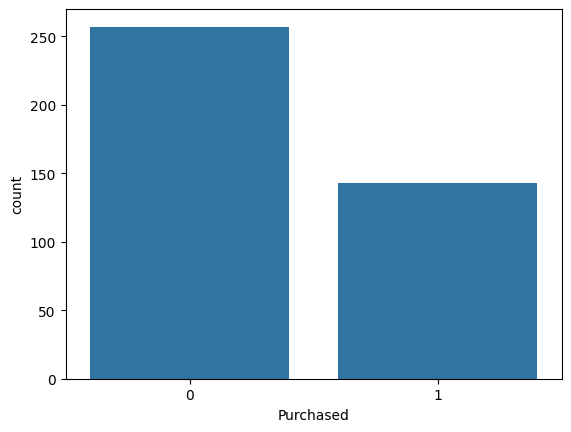

In [24]:
sns.countplot(x='Purchased', data = df)

plt.show()

400개의 관측치 중 0값은 약 250개, 1값은 약 150개 가량이다

1값이 전체의 약 35% 정도로 약간의 클래스 불균형이 존재한다

# 6. gender칼럼 가변수 처리

In [25]:
df_d = pd.get_dummies(df['Gender'])

df_d['Male'] = df_d['Male'].astype(int) # Male 값을 정수형으로 변환

df2 = pd.merge(df.drop(['Gender'], axis=1),
               df_d['Male'], left_index=True, right_index= True, how = 'inner')

df2.head()

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


Gender 칼럼을 가변수로 처리해준다

# 7. 학습셋과 테스트셋 분리

In [26]:
x = df2.drop(['Purchased'], axis=1)
y = df2[['Purchased']]

x_train, x_test, y_train, y_test = train_test_split(
    x,y,test_size=0.25, random_state=10)

x_train.head()

,User ID,Age,EstimatedSalary,Male
57,15807481,28,79000,1
87,15631912,28,85000,0
357,15671387,41,72000,0
355,15606472,60,34000,1
238,15617877,46,82000,0


언더샘플링이나 오버샘플링을 하는 이유는 머신러닝 모델의 성능을 향상시키기 위한 것이기 깨문에 모델에 적합하도록 데이터셋을 전처리해야 한다

테스트셋은 실제 데이터에 대한 모델 성능을 평가하는 용도록 사용하는 것이기 때문에 학습셋에만 언더샘플링이나 오버샘플링을 적용한다



# 8. 언더샘플링 적용

In [30]:
x_train_under, y_train_under = RandomUnderSampler(
    random_state=0).fit_resample(x_train, y_train)

print('RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트: ',
      x_train.shape, y_train.shape)
print('RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트: '
    , x_train_under.shape, y_train_under.shape)
print('RandomUnderSampler 적용 전 레이블 값 분포: \n',
      pd.Series(y_train['Purchased']).value_counts())
print('RandomUnderSampler 적용 후 레이블 값 분포: \n',
      pd.Series(y_train_under['Purchased']).value_counts())


RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트:  (300, 4) (300, 1)
RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트:  (224, 4) (224, 1)
RandomUnderSampler 적용 전 레이블 값 분포: 
 Purchased
0    188
1    112
Name: count, dtype: int64
RandomUnderSampler 적용 후 레이블 값 분포: 
 Purchased
0    112
1    112
Name: count, dtype: int64


RandomUnderSampler() 함수를 적용하여 학습셋에 언더샘플링을 적용한다

언더샘플링은 비율이 높은 클래스의 관측치를 적은 비율의 클래스만큼 줄이는 것이므로

기존 300개의 관측치가 112:112의 224개 관측치로 감소했다

# 9. 언더샘플링 적용 후 클래스 분포 시각화

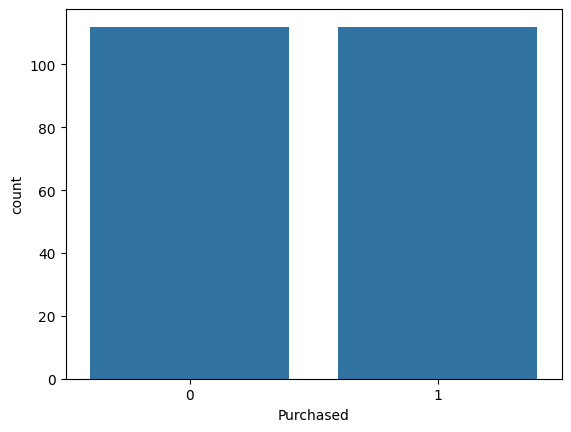

In [31]:
sns.countplot(x='Purchased', data=y_train_under)

plt.show()

# 10. 오버샘플링 적용(SMOTE)


In [32]:
smote = SMOTE(k_neighbors=2, random_state=0)
# 새로운 샘플 생성 시 2개의 가장 가까운 이웃을 참조하고, 결과의 재현성을 보장하기 위해 난수 생성기의 시드 값을 0으로 설정하는 것을 의미

oversample = SMOTE()

x_train_over, y_train_over = smote.fit_resample(x_train, y_train)
print('SMOTE 적용 전 학습용 변수/레이블 데이터 세트: ',
      x_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 변수/레이블 데이터 세트: ',
      x_train_over.shape, y_train_over.shape)
print('SMOTE 적용 전 레이블 값 분포: \n',
      pd.Series(y_train['Purchased']).value_counts())
print('SMOTE 적용 후 레이블 값 분포: \n',
      pd.Series(y_train_over['Purchased']).value_counts())

SMOTE 적용 전 학습용 변수/레이블 데이터 세트:  (300, 4) (300, 1)
SMOTE 적용 후 학습용 변수/레이블 데이터 세트:  (376, 4) (376, 1)
SMOTE 적용 전 레이블 값 분포: 
 Purchased
0    188
1    112
Name: count, dtype: int64
SMOTE 적용 후 레이블 값 분포: 
 Purchased
0    188
1    188
Name: count, dtype: int64


# 11. 오버샘플링 적용 후 클래스 분포 시각화

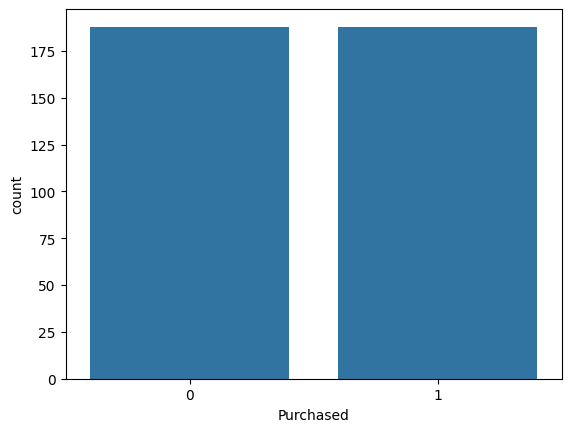

In [33]:
sns.countplot(x='Purchased', data = y_train_over)

plt.show()